<a href="https://colab.research.google.com/github/hoomanabasi/Image-Classification-with-cnn/blob/main/Image_Classification_with_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_test=x_test/255.0
x_train=x_train/255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [19]:
model=keras.Sequential(
    [
        keras.Input(shape=(32,32,3)),
        keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(64,activation="relu"),
        keras.layers.Dense(128,activation="relu"),
        keras.layers.Dense(10,activation="softmax")
    ]
)
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
hist=model.fit(x_train,y_train,epochs=25,batch_size=128,verbose=2)

Epoch 1/25
391/391 - 7s - 19ms/step - accuracy: 0.4118 - loss: 1.5973
Epoch 2/25
391/391 - 3s - 7ms/step - accuracy: 0.5592 - loss: 1.2380
Epoch 3/25
391/391 - 5s - 13ms/step - accuracy: 0.6123 - loss: 1.0954
Epoch 4/25
391/391 - 3s - 7ms/step - accuracy: 0.6496 - loss: 1.0030
Epoch 5/25
391/391 - 5s - 13ms/step - accuracy: 0.6743 - loss: 0.9336
Epoch 6/25
391/391 - 3s - 7ms/step - accuracy: 0.6902 - loss: 0.8845
Epoch 7/25
391/391 - 3s - 7ms/step - accuracy: 0.7046 - loss: 0.8412
Epoch 8/25
391/391 - 3s - 7ms/step - accuracy: 0.7197 - loss: 0.7996
Epoch 9/25
391/391 - 5s - 13ms/step - accuracy: 0.7329 - loss: 0.7605
Epoch 10/25
391/391 - 3s - 7ms/step - accuracy: 0.7412 - loss: 0.7375
Epoch 11/25
391/391 - 3s - 7ms/step - accuracy: 0.7547 - loss: 0.7004
Epoch 12/25
391/391 - 3s - 7ms/step - accuracy: 0.7622 - loss: 0.6766
Epoch 13/25
391/391 - 3s - 7ms/step - accuracy: 0.7681 - loss: 0.6554
Epoch 14/25
391/391 - 3s - 7ms/step - accuracy: 0.7784 - loss: 0.6255
Epoch 15/25
391/391 - 3s 

313/313 - 2s - 5ms/step - accuracy: 0.7505 - loss: 0.7448
Test Accuracy: 0.7505000233650208


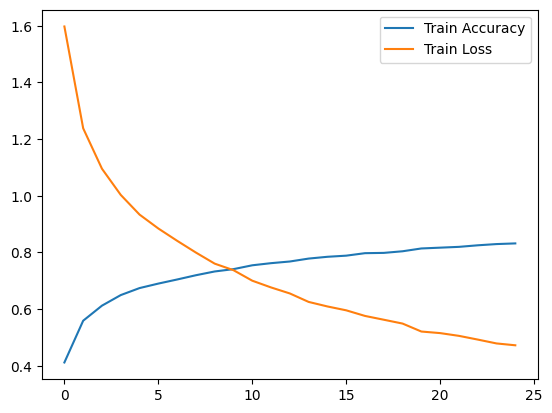

In [20]:
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['loss'], label='Train Loss')
plt.legend()
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step


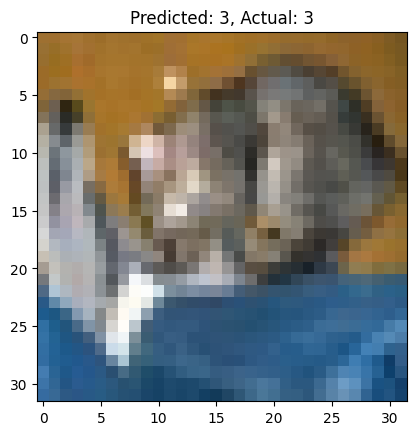

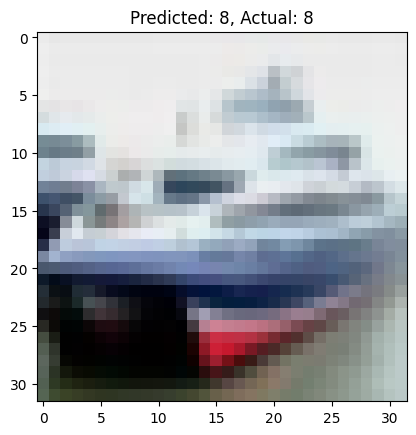

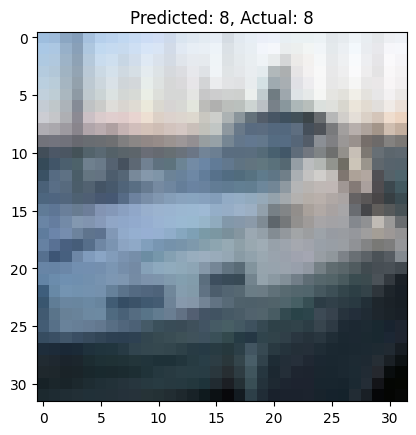

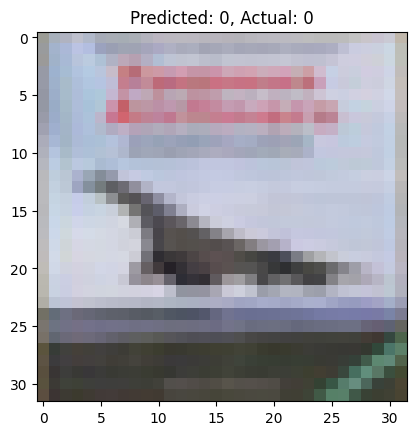

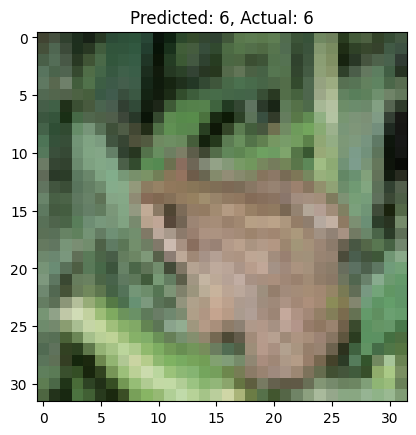

In [21]:
predictions = model.predict(x_test[:5])
for i in range(5):
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i][0]}")
    plt.show()